# Listwise Deletion

# Titanic dataset
This data is collected after the accident has happened.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#MCAR
df=pd.read_csv("C:/Users/AK/Desktop/project/Train.csv")

In [3]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [5]:
# Import Label encoder
from sklearn import preprocessing


l=['Sex']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(df[i])
    print(i,label_encoder.classes_)
    
    df[i]=label_encoder.transform(df[i])
    
df.head()

# 0-female 1-male

Sex ['female' 'male']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


Here we have missing values in variables Age, Cabin (cabin number) , Embarked (C,Q,S)

<AxesSubplot:>

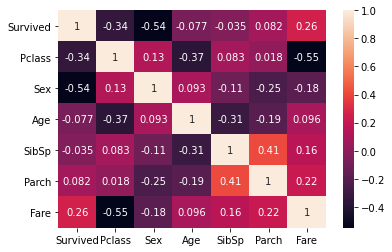

In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [7]:
df['Cabin']=np.where(df['Cabin'].isnull(),1,0)
df['Cabin']        # 1- missing values
                   # 0- not missing values

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin, Length: 891, dtype: int32

In [8]:
df[df['Embarked'].isnull()]  #2 missing values

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,0,38.0,0,0,80.0,0,NaN
829,1,1,0,62.0,0,0,80.0,0,NaN


In [9]:
df['Embarked']=np.where(df['Embarked'].isnull(),1,0)
df['Embarked']        # 1- missing values
                      # 0- not missing values

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Embarked, Length: 891, dtype: int32

# Listwise Deletion

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [12]:
x=df.iloc[:,1:]
y=df[['Survived']]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,1,0
3,1,0,35.0,1,0,53.1000,0,0
4,3,1,35.0,0,0,8.0500,1,0


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)

(499, 8)
(215, 8)


# Evaluating Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=25)

In [15]:
knn.fit(x_train,y_train)

<ipython-input-15-17b0ab828d68>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=25)

In [16]:
#Predict the respose for test dataset

y_pred=knn.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [17]:
#Confusion matrix

from sklearn.metrics import confusion_matrix

confMat=confusion_matrix(y_test,y_pred)
confMat

array([[101,  22],
       [ 46,  46]], dtype=int64)

In [18]:
from sklearn import metrics

from sklearn.metrics import accuracy_score
#model accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6837209302325581


We get 68.37% accuracy by filling missing data with its mean values and for evaluation we use knn classification

In [19]:
# MAE,MSE and RMSE
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

MAE1=mean_absolute_error(y_test,y_pred)
MSE1=mean_squared_error(y_test,y_pred)
RMSE1=sqrt(MSE1)

print("MAE1: ",MAE1)
print("MSE1: ",MSE1)
print("RMSE1: ",RMSE1)

MAE1:  0.31627906976744186
MSE1:  0.31627906976744186
RMSE1:  0.5623869395420219


# Evaluating using logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lm=LogisticRegression(solver='liblinear',random_state=101).fit(x_train,y_train)

print("R square : ", lm.score(x_train,y_train))

R square :  0.8016032064128257


C:\Users\AK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Thus this model explained 80.16 % variability in life expentancy when missing values are replace using median of that particular variable column .